In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

notas = pd.read_csv('aula0/ml-latest-small/ratings.csv', sep = ',')
filmes = pd.read_csv('aula0/ml-latest-small/movies.csv', sep = ',')

notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
filmes.columns = ['filmeId', 'titulo', 'generos']

In [54]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

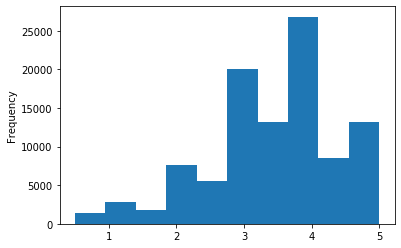

In [55]:
notas.nota.plot(kind='hist')

In [56]:
print('mediana:',notas.nota.median(),'Media:',notas.nota.mean())

mediana: 3.5 Media: 3.501556983616962


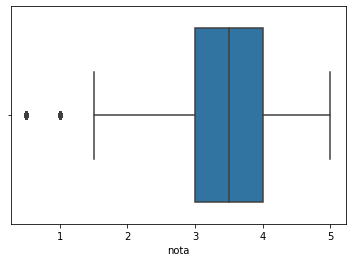

In [58]:
sns.boxplot(notas.nota)

## Analisando notas especificas por filmes

In [75]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [80]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

NameError: name 'meias_por_filme' is not defined

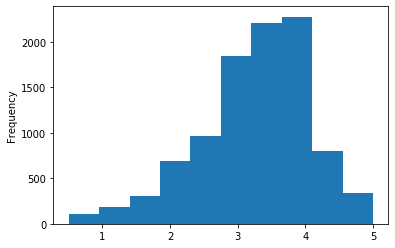

In [82]:
medias_por_filme.plot(kind='hist')


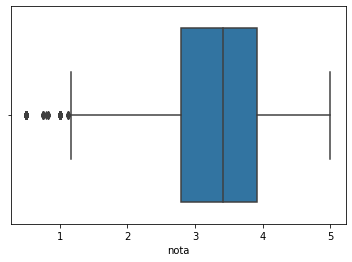

In [90]:
sns.boxplot(medias_por_filme)


In [85]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

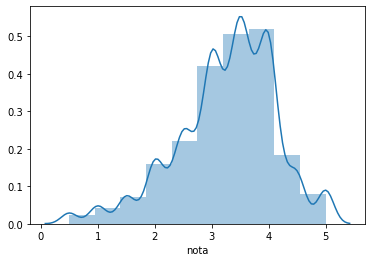

In [93]:
sns.distplot(medias_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias do filme')

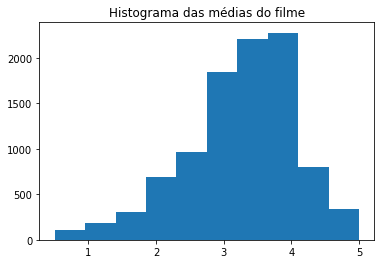

In [95]:
plt.hist(medias_por_filme)
plt.title('Histograma das médias do filme')

In [97]:
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')

In [99]:
tmdb.original_language.unique() # Categoria nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [100]:
# budget -> orçamento -> quantitativo continuo
#notas -> quantitativo não continuo

In [109]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language",'total']

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


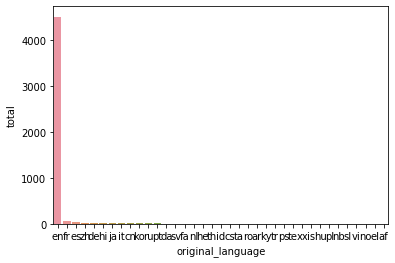

In [115]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

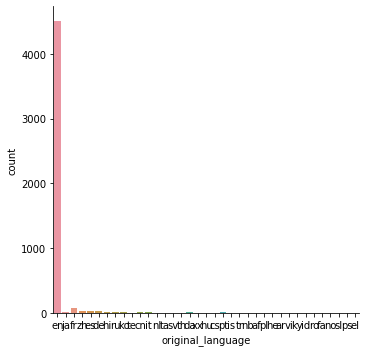

In [116]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x262319f7bc8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(

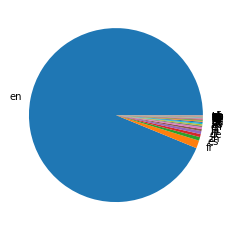

In [118]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [126]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

In [130]:
print(total_de_ingles, total_do_resto)

dados = {
    "lingua": ['ingles','outros'],
    "total": [total_de_ingles, total_do_resto]
}

pd.DataFrame(dados)

4505 298


,lingua,total
0,ingles,4505
1,outros,298


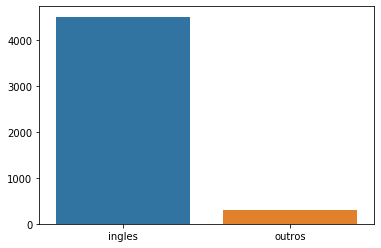

In [132]:
sns.barplot(x="lingua",y="total", data = dados)

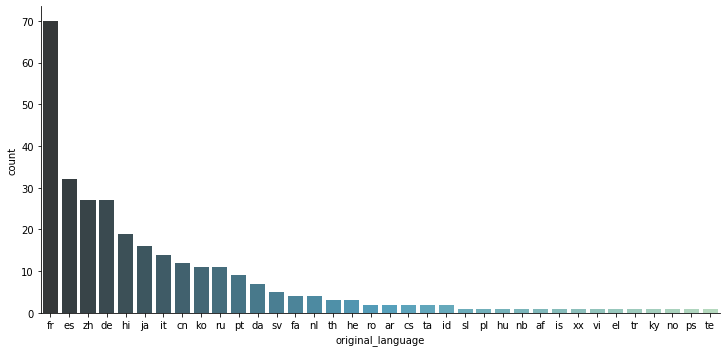

In [149]:
total_lingua_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")


sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, aspect = 2,
            order = total_lingua_outros_filmes.index,
            palette="GnBu_d"
            
                )

In [154]:
filmes.head(2)


,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [172]:
notas_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")


In [173]:
print(len(notas_toy_story), len(notas_do_jumanji))

215 110


In [177]:
print("Nota Media do toy story", notas_toy_story.nota.mean())
print("Nota Media do jumanji", notas_do_jumanji.nota.mean())

print("Nota Media do toy story", notas_toy_story.nota.median())
print("Nota Media do jumanji", notas_do_jumanji.nota.median())

Nota Media do toy story 3.9209302325581397
Nota Media do jumanji 3.4318181818181817
Nota Media do toy story 4.0
Nota Media do jumanji 3.5


In [183]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

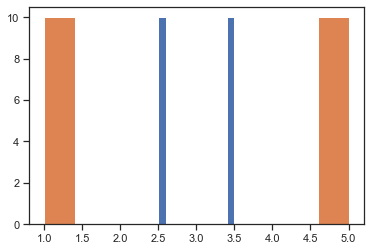

In [189]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x26234d7edc8>,
 'caps': [<matplotlib.lines.Line2D at 0x26234df5a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x26234debfc8>,
 'medians': [<matplotlib.lines.Line2D at 0x26234dfba08>,
 'fliers': [<matplotlib.lines.Line2D at 0x26234dfbac8>,
 'means': []}

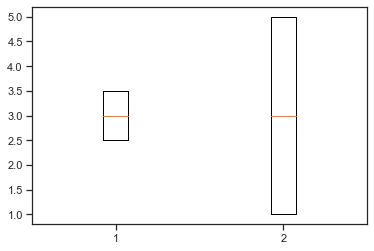

In [192]:
plt.boxplot([filme1, filme2])